<a href="https://colab.research.google.com/github/2303A52450/b39-Explainable-ai/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2303A52450
s.vrishank
asignment-5

(23372, 4)
Entity                   object
Code                     object
Year                      int64
Annual CO2 emissions    float64
dtype: object
Entity                     0
Code                    4128
Year                       0
Annual CO2 emissions       0
dtype: int64
               Year  Annual CO2 emissions
count  23372.000000          23372.000000
mean    1949.396072            373.760205
std       61.696631           1877.783327
min     1751.000000             -5.397072
25%     1924.000000              0.373728
50%     1969.000000              4.806241
75%     1994.000000             48.088440
max     2018.000000          36572.754220


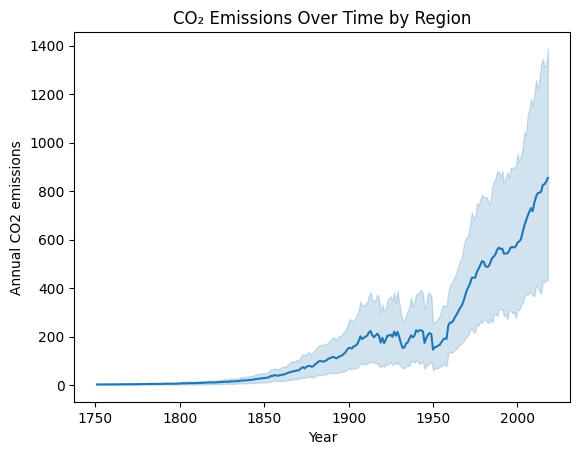

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/annual-co2-emissions-per-country.csv")  # Replace with actual path

# Basic inspection
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

# Summary stats
print(df.describe())

# Time trends
sns.lineplot(data=df, x='Year', y='Annual CO2 emissions')
plt.title("CO₂ Emissions Over Time by Region")
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Rename columns
df.rename(columns={'Entity': 'Country', 'Code': 'Region'}, inplace=True)

# Handle missing values in numeric columns
for col in df.select_dtypes(include='number').columns:
  df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df['Region'] = LabelEncoder().fit_transform(df['Region'])

# Scale features
features = df.drop(columns=['Annual CO2 emissions'])
target = df['Annual CO2 emissions']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

/tmp/ipython-input-3549352517.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print(f"{name} → MAE: {mean_absolute_error(y_test, preds):.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2_score(y_test, preds):.2f}")

Linear → MAE: 675.64, MSE: 3362901.39, RMSE: 1833.82, R²: 0.06
Ridge → MAE: 675.62, MSE: 3362903.67, RMSE: 1833.82, R²: 0.06
Lasso → MAE: 674.86, MSE: 3363021.36, RMSE: 1833.85, R²: 0.06
DecisionTree → MAE: 14.09, MSE: 4319.42, RMSE: 65.72, R²: 1.00
RandomForest → MAE: 11.75, MSE: 2945.13, RMSE: 54.27, R²: 1.00
GradientBoosting → MAE: 212.90, MSE: 450461.16, RMSE: 671.16, R²: 0.87
SVR → MAE: 378.04, MSE: 3658855.66, RMSE: 1912.81, R²: -0.02


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, GRU, MaxPooling1D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MLP
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Training MLP...")
mlp.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
mlp_preds = mlp.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_preds)
mlp_rmse = np.sqrt(mlp_mse)
print(f"MLP → MAE: {mean_absolute_error(y_test, mlp_preds):.2f}, MSE: {mlp_mse:.2f}, RMSE: {mlp_rmse:.2f}, R²: {r2_score(y_test, mlp_preds):.2f}")

# CNN (1D)
X_train_seq_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_seq_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
cnn = Sequential([
    Conv1D(64, 1, activation='relu', input_shape=(X_train_seq_cnn.shape[1], 1)),
    Flatten(),
    Dense(1)
])
cnn.compile(optimizer='adam', loss='mse')
print("Training CNN...")
cnn.fit(X_train_seq_cnn, y_train, epochs=50, validation_split=0.2, verbose=0)
cnn_preds = cnn.predict(X_test_seq_cnn)
cnn_mse = mean_squared_error(y_test, cnn_preds)
cnn_rmse = np.sqrt(cnn_mse)
print(f"CNN → MAE: {mean_absolute_error(y_test, cnn_preds):.2f}, MSE: {cnn_mse:.2f}, RMSE: {cnn_rmse:.2f}, R²: {r2_score(y_test, cnn_preds):.2f}")


# LSTM
X_train_seq_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_seq_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
lstm = Sequential([
    LSTM(64, input_shape=(X_train_seq_lstm.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm.compile(optimizer='adam', loss='mse')
print("Training LSTM...")
lstm.fit(X_train_seq_lstm, y_train, epochs=50, validation_split=0.2, verbose=0)
lstm_preds = lstm.predict(X_test_seq_lstm)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_rmse = np.sqrt(lstm_mse)
print(f"LSTM → MAE: {mean_absolute_error(y_test, lstm_preds):.2f}, MSE: {lstm_mse:.2f}, RMSE: {lstm_rmse:.2f}, R²: {r2_score(y_test, lstm_preds):.2f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training MLP...
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MLP → MAE: 512.55, MSE: 2480737.96, RMSE: 1575.04, R²: 0.31
Training CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN → MAE: 673.26, MSE: 3323099.21, RMSE: 1822.94, R²: 0.08
Training LSTM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM → MAE: 268.20, MSE: 1064492.48, RMSE: 1031.74, R²: 0.70


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# PDP
# We will use the 'Year' feature for the PDP plot as it is a relevant numerical feature.
PartialDependenceDisplay.from_estimator(models["RandomForest"], X_test, ['Year'], feature_names=features.columns.tolist())
plt.suptitle("Partial Dependence Plot for Year")
plt.show()